In [ ]:
!pip install navec slovnet ipymarkup

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.7 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=3b8fba7cb259845689d5d7b96513ba0ae5682788e0a2700b507b50eb00e8783d
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [ ]:
# Убедитесь, что библиотеки установлены:
# !pip install navec slovnet ipymarkup

from google.colab import files
from navec import Navec
from slovnet import NER

# 1. Загрузка одного или нескольких файлов
uploaded = files.upload()

if not uploaded:
    raise ValueError("Файлы не загружены.")

# 2. Чтение текста из всех загруженных файлов
all_text = ""
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        all_text += f.read() + "\n\n"  # Добавляем разделитель между файлами

# 3. Загрузка моделей
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
ner = NER.load('slovnet_ner_news_v1.tar')
ner.navec(navec)

# 4. Обработка текста
markup = ner(all_text)

# 5. Извлечение именованных сущностей
entities = []
for span in markup.spans:
    entity_type = span.type
    start = span.start
    stop = span.stop
    entity_text = markup.text[start:stop]
    entities.append(f"{entity_type}\t{entity_text}\n")

# 6. Сохранение результатов в файл
output_file = "ner_entities.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.writelines(entities)

# 7. Скачивание файла
files.download(output_file)

print(f"Обработка завершена. Результат сохранён в '{output_file}'.")

Saving Brill_Bit_Operations.txt to Brill_Bit_Operations (4).txt
Saving Drill_bits_for_RSS.txt to Drill_bits_for_RSS (4).txt
Saving Drill_String_design.txt to Drill_String_design (4).txt
Saving Drilling_Planning.txt to Drilling_Planning (4).txt
Saving Horizontal_Stress.txt to Horizontal_Stress (4).txt
Saving Hydraulic_Fracturing.txt to Hydraulic_Fracturing (4).txt
Saving Mud_handling.txt to Mud_handling (4).txt
Saving Perm_Tech_Uni.txt to Perm_Tech_Uni (4).txt
Saving Rosneft_LLM.txt to Rosneft_LLM (4).txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Обработка завершена. Результат сохранён в 'ner_entities.txt'.


In [ ]:
from google.colab import files
from razdel import sentenize, tokenize
from navec import Navec
from slovnet import Morph
import os

# 1. Загрузка нескольких файлов
uploaded = files.upload()

# Проверяем, что файлы загружены
if not uploaded:
    raise ValueError("Файлы не загружены.")

# 2. Чтение текста из всех файлов
all_text = ""
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        all_text += f.read() + "\n\n"  # Добавляем разделитель между файлами

# 3. Разделение на предложения и токены
chunk = []
for sent in sentenize(all_text):
    tokens = [_.text for _ in tokenize(sent.text)]
    chunk.append(tokens)

# 4. Загрузка моделей
# (Убедитесь, что модели уже загружены в Colab)
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
morph = Morph.load('slovnet_morph_news_v1.tar', batch_size=4)
morph.navec(navec)

# 5. Обработка всего чанка
results = []
for markup in morph.map(chunk):
    for token in markup.tokens:
        results.append(f"{token.text:>20} {token.tag}\n")

# 6. Сохранение результата в файл
output_file = "morph_analysis.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.writelines(results)

# 7. Скачивание файла пользователем
files.download(output_file)

print(f"Обработка завершена. Результат сохранён в '{output_file}' и будет загружен.")

Saving Brill_Bit_Operations.txt to Brill_Bit_Operations (2).txt
Saving Drill_bits_for_RSS.txt to Drill_bits_for_RSS (2).txt
Saving Drill_String_design.txt to Drill_String_design (2).txt
Saving Drilling_Planning.txt to Drilling_Planning (2).txt
Saving Horizontal_Stress.txt to Horizontal_Stress (2).txt
Saving Hydraulic_Fracturing.txt to Hydraulic_Fracturing (2).txt
Saving Mud_handling.txt to Mud_handling (2).txt
Saving Perm_Tech_Uni.txt to Perm_Tech_Uni (2).txt
Saving Rosneft_LLM.txt to Rosneft_LLM (2).txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Обработка завершена. Результат сохранён в 'morph_analysis.txt' и будет загружен.


Saving Brill_Bit_Operations.txt to Brill_Bit_Operations (10).txt
Saving Drill_bits_for_RSS.txt to Drill_bits_for_RSS (10).txt
Saving Drill_String_design.txt to Drill_String_design (10).txt
Saving Drilling_Planning.txt to Drilling_Planning (10).txt
Saving Horizontal_Stress.txt to Horizontal_Stress (10).txt
Saving Hydraulic_Fracturing.txt to Hydraulic_Fracturing (10).txt
Saving Mud_handling.txt to Mud_handling (10).txt
Saving Perm_Tech_Uni.txt to Perm_Tech_Uni (10).txt
Saving Rosneft_LLM.txt to Rosneft_LLM (10).txt


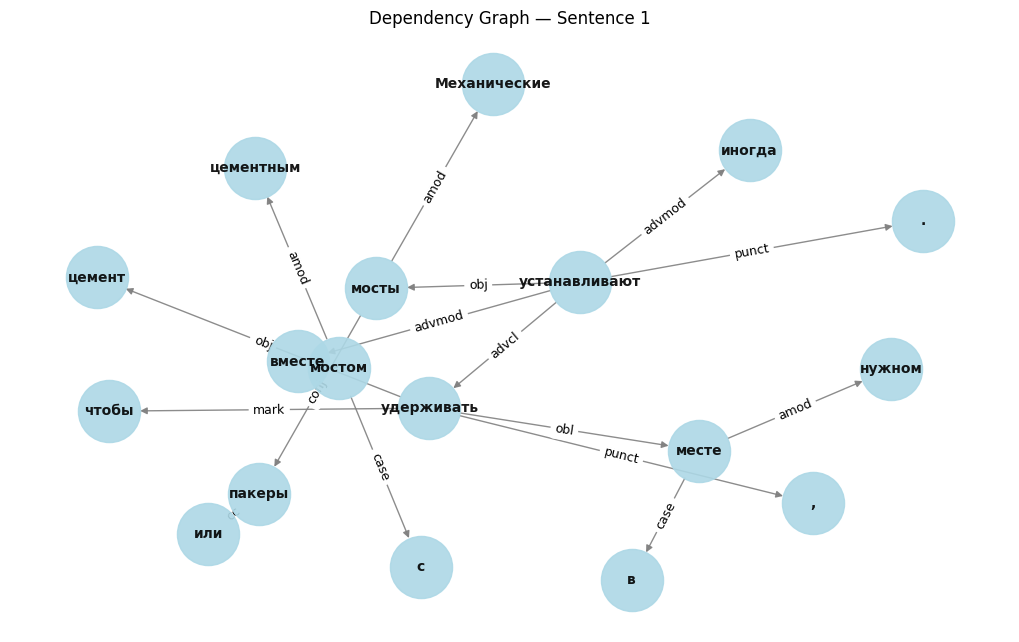

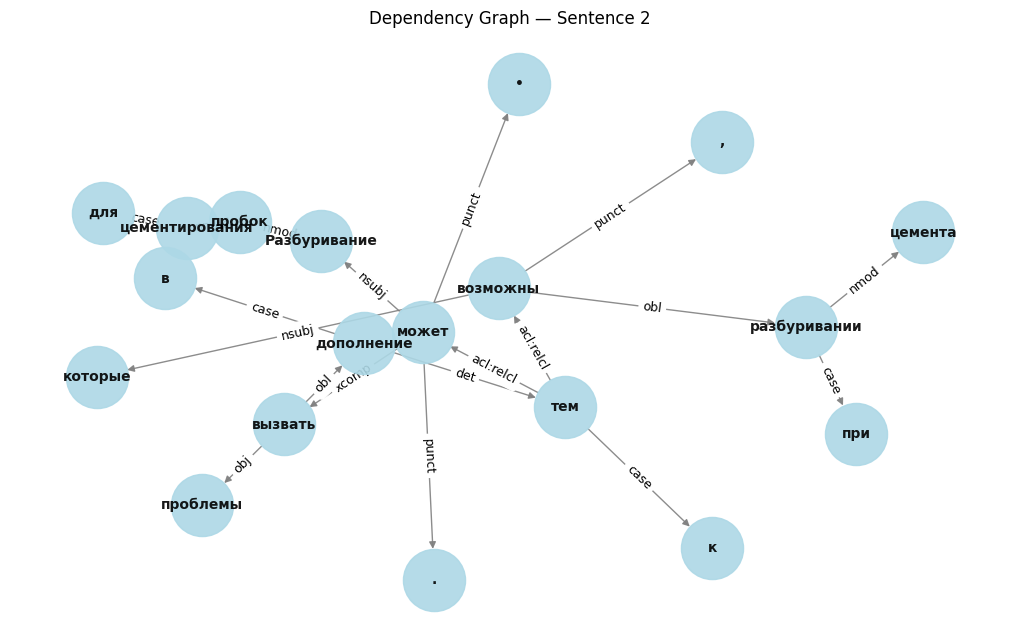

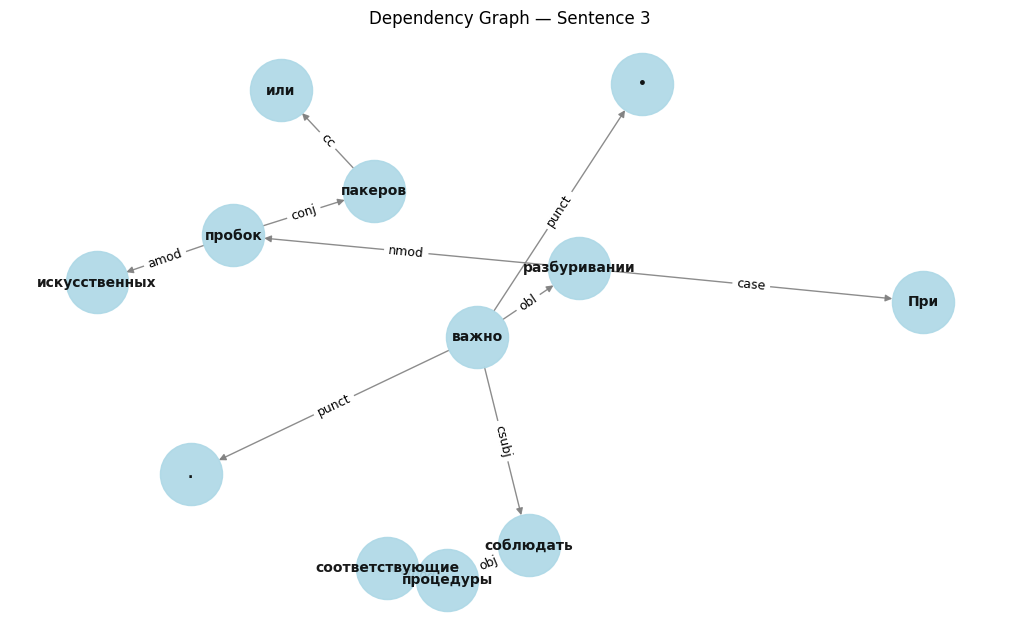

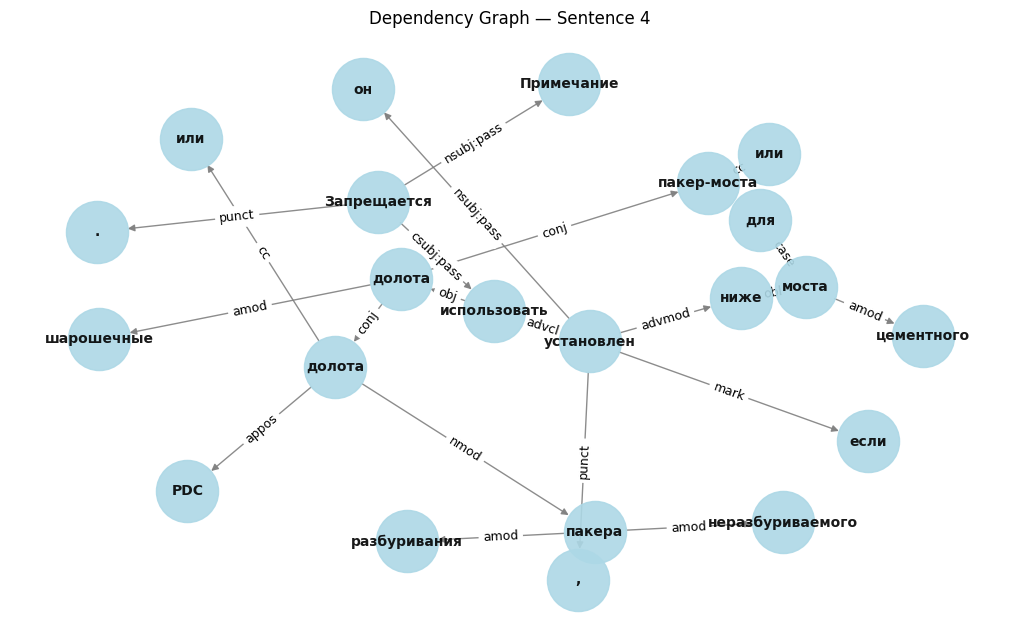

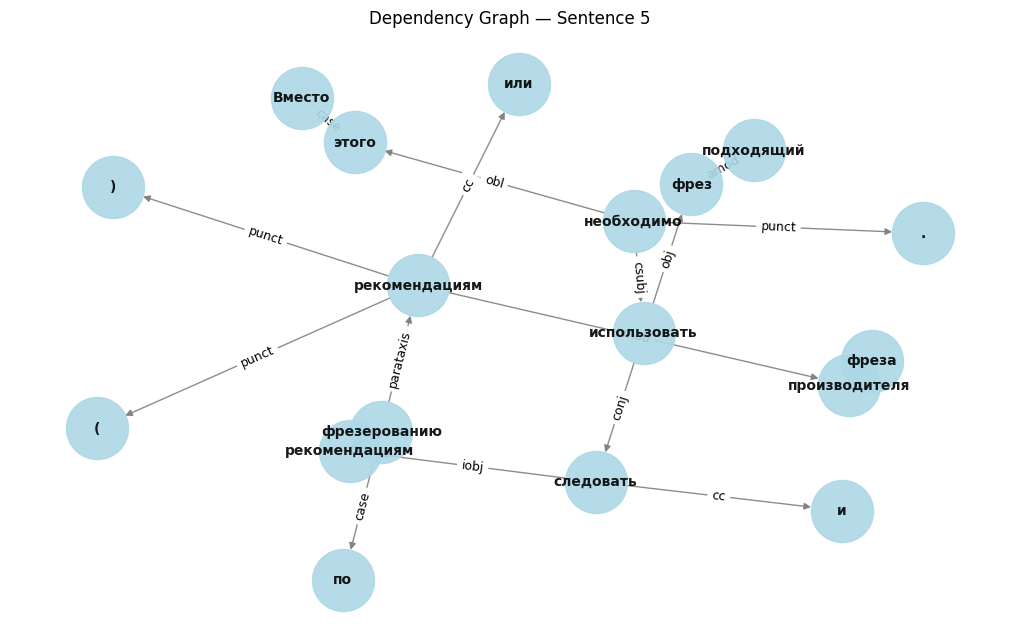

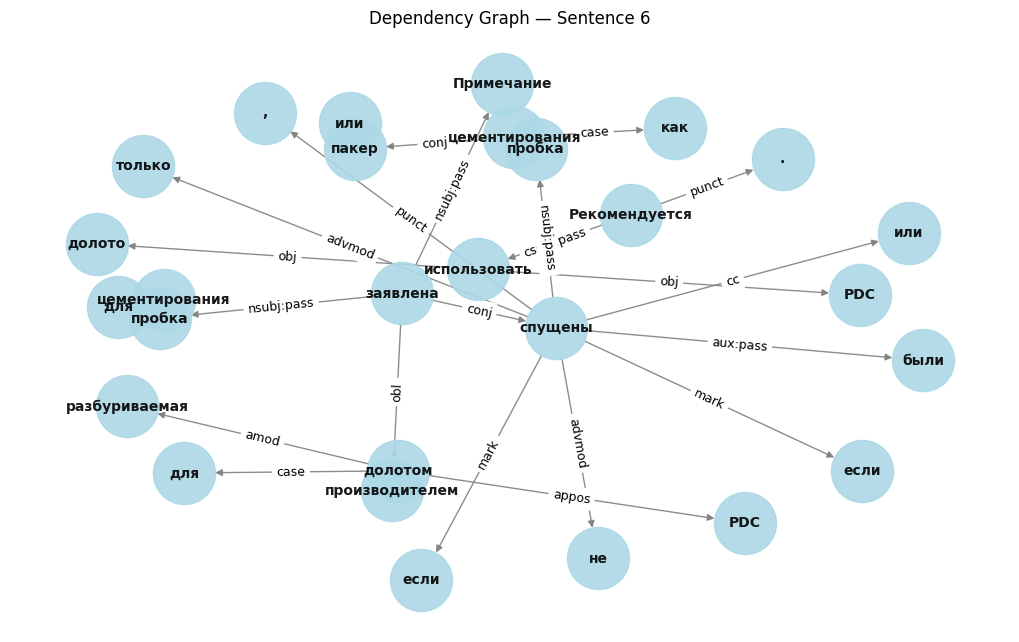

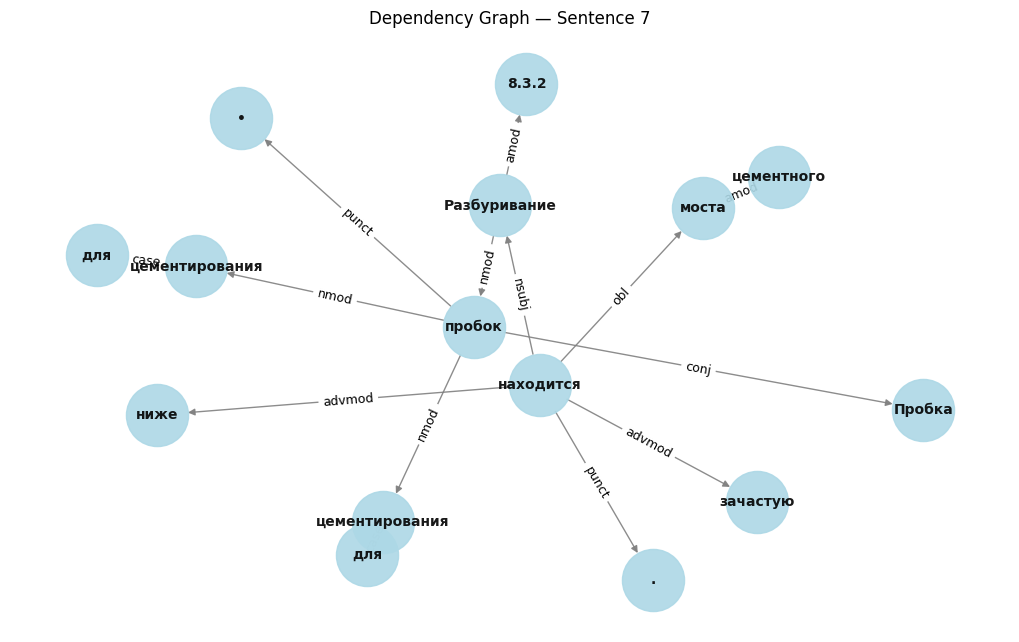

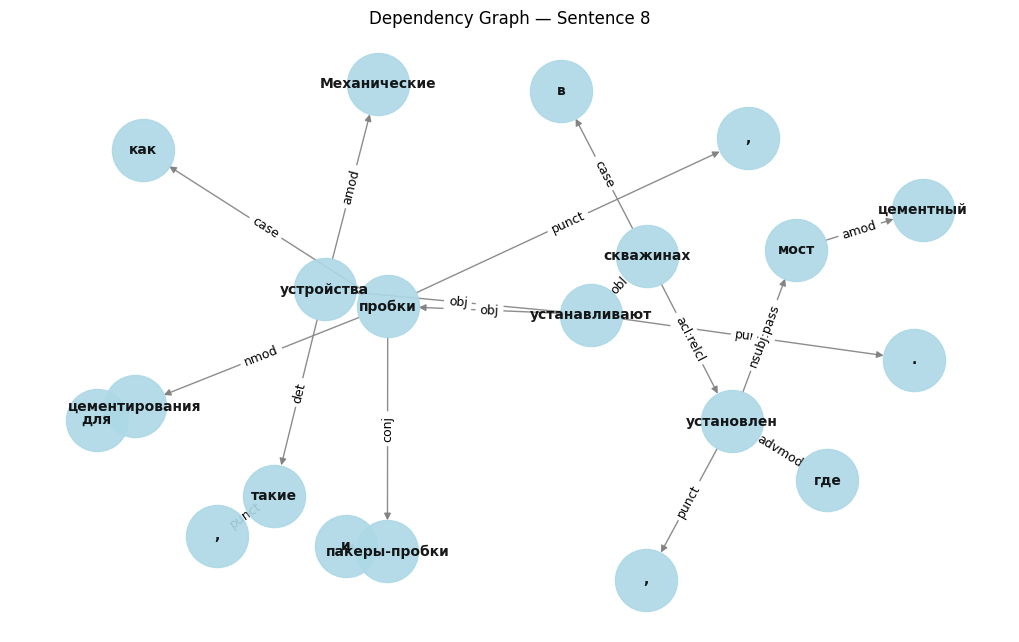

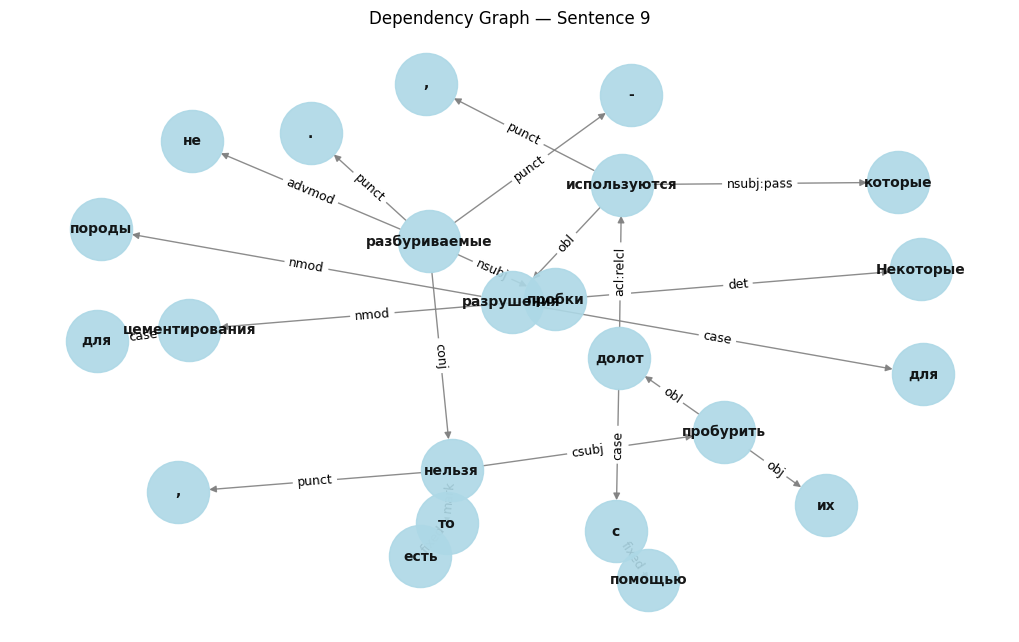

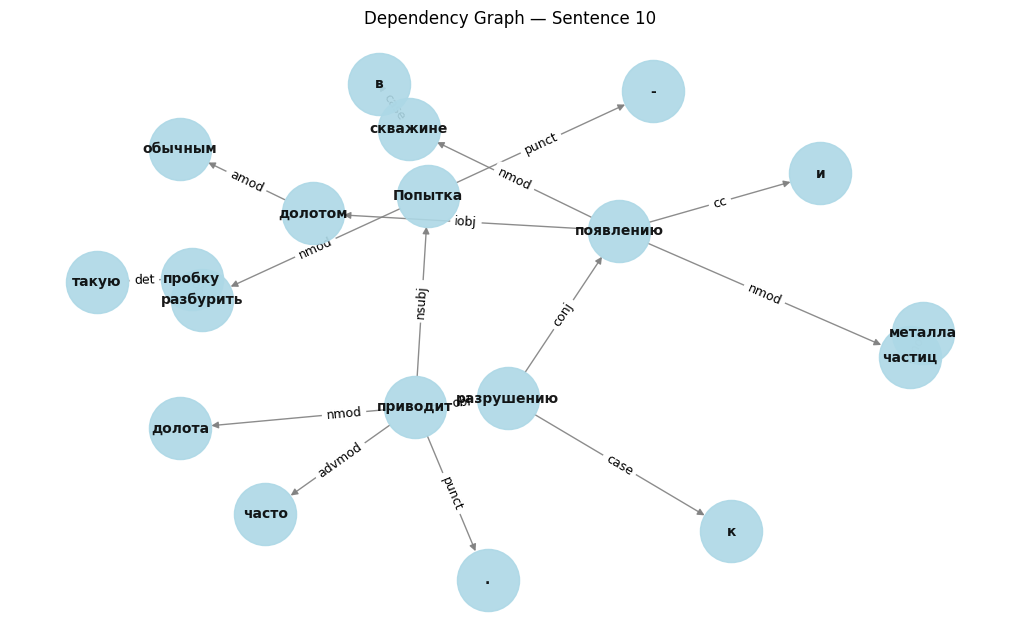

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Обработка завершена. Результат сохранён в 'syntax_dependencies.txt'.


In [ ]:
# Убедитесь, что библиотеки установлены:
# !pip install razdel navec slovnet ipymarkup networkx matplotlib

from google.colab import files
from razdel import sentenize, tokenize
from navec import Navec
from slovnet import Syntax
import networkx as nx
import matplotlib.pyplot as plt

# 1. Загрузка одного или нескольких файлов
uploaded = files.upload()

if not uploaded:
    raise ValueError("Файлы не загружены.")

# 2. Чтение текста из всех загруженных файлов
all_text = ""
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        all_text += f.read() + "\n\n"

# 3. Разбиваем на предложения и токены
sentences = [sent.text for sent in sentenize(all_text)]
chunk = []
for sent in sentenize(all_text):
    tokens = [_.text for _ in tokenize(sent.text)]
    chunk.append(tokens)

# 4. Загрузка моделей
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
syntax = Syntax.load('slovnet_syntax_news_v1.tar')
syntax.navec(navec)

# 5. Обработка каждого предложения: сбор зависимостей и визуализация
results = []

for i, (markup, sentence) in enumerate(zip(syntax.map(chunk), sentences)):
    results.append(f"# Sentence {i+1}\n")
    results.append(f"Sentence: {sentence}\n")

    G = nx.DiGraph()

    # Добавляем все возможные узлы
    token_count = len(markup.tokens)
    for idx in range(token_count):
        G.add_node(idx, label=markup.tokens[idx].text)

    # Добавляем рёбра с проверкой
    for token in markup.tokens:
        source = int(token.head_id) - 1
        target = int(token.id) - 1
        rel = token.rel
        if source != target and source >= 0:
            # Проверяем, существуют ли оба узла
            if source < token_count and target < token_count:
                G.add_edge(source, target, label=rel)
                results.append(f"{source} → {target}: {rel} ({token.text})\n")

    results.append("\n")

    # Визуализация графа
    pos = nx.spring_layout(G, seed=42)
    labels = {idx: markup.tokens[idx].text for idx in range(token_count)}

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000,
            node_color="lightblue", font_size=10, font_weight="bold",
            arrows=True, edge_color="gray", alpha=0.9)

    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title(f"Dependency Graph — Sentence {i+1}")
    plt.show()

# 6. Сохранение результата в файл
output_file = "syntax_dependencies.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.writelines(results)

# 7. Скачивание файла
files.download(output_file)

print(f"Обработка завершена. Результат сохранён в '{output_file}'.")